In [2]:
%pip install --upgrade google-cloud-aiplatform

     ---------------------------------------- 4.8/4.8 MB 5.7 MB/s eta 0:00:00
     ------------------------------------- 333.7/333.7 kB 10.4 MB/s eta 0:00:00
  Using cached google_auth-2.29.0-py2.py3-none-any.whl (189 kB)
     ---------------------------------------- 48.8/48.8 kB ? eta 0:00:00
     -------------------------------------- 138.3/138.3 kB 4.1 MB/s eta 0:00:00
  Using cached protobuf-4.25.3-cp310-abi3-win_amd64.whl (413 kB)
     -------------------------------------- 235.5/235.5 kB 7.3 MB/s eta 0:00:00
     -------------------------------------- 125.6/125.6 kB 7.7 MB/s eta 0:00:00
     -------------------------------------- 409.3/409.3 kB 8.5 MB/s eta 0:00:00
     ---------------------------------------- 1.4/1.4 MB 7.0 MB/s eta 0:00:00
  Using cached googleapis_common_protos-1.63.0-py2.py3-none-any.whl (229 kB)
     ---------------------------------------- 3.8/3.8 MB 6.9 MB/s eta 0:00:00
  Using cached cachetools-5.3.3-py3-none-any.whl (9.3 kB)
     ------------------------


[notice] A new release of pip available: 22.3.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
import base64
import glob
import os
from datetime import datetime
from io import BytesIO

import requests
from google.cloud import aiplatform, storage
from PIL import Image


def create_job_name(prefix):
    user = os.environ.get("USER")
    now = datetime.now().strftime("%Y%m%d_%H%M%S")
    job_name = f"{prefix}-{user}-{now}"
    return job_name


def download_image(url):
    response = requests.get(url)
    return Image.open(BytesIO(response.content))


def image_to_base64(image, format="JPEG"):
    buffer = BytesIO()
    image.save(buffer, format=format)
    image_str = base64.b64encode(buffer.getvalue()).decode("utf-8")
    return image_str


def base64_to_image(image_str):
    image = Image.open(BytesIO(base64.b64decode(image_str)))
    return image


def image_grid(imgs, rows=2, cols=2):
    w, h = imgs[0].size
    grid = Image.new("RGB", size=(cols * w, rows * h))
    for i, img in enumerate(imgs):
        grid.paste(img, box=(i % cols * w, i // cols * h))
    return grid

In [4]:
from google.oauth2 import service_account
from google.cloud import aiplatform

credentials = service_account.Credentials.from_service_account_file('spatial-shore-421209-73a285f31931.json')
stable_diff_endpoint = aiplatform.Endpoint(endpoint_name='8260732014550843392', project='spatial-shore-421209', location='europe-west2', credentials=credentials)

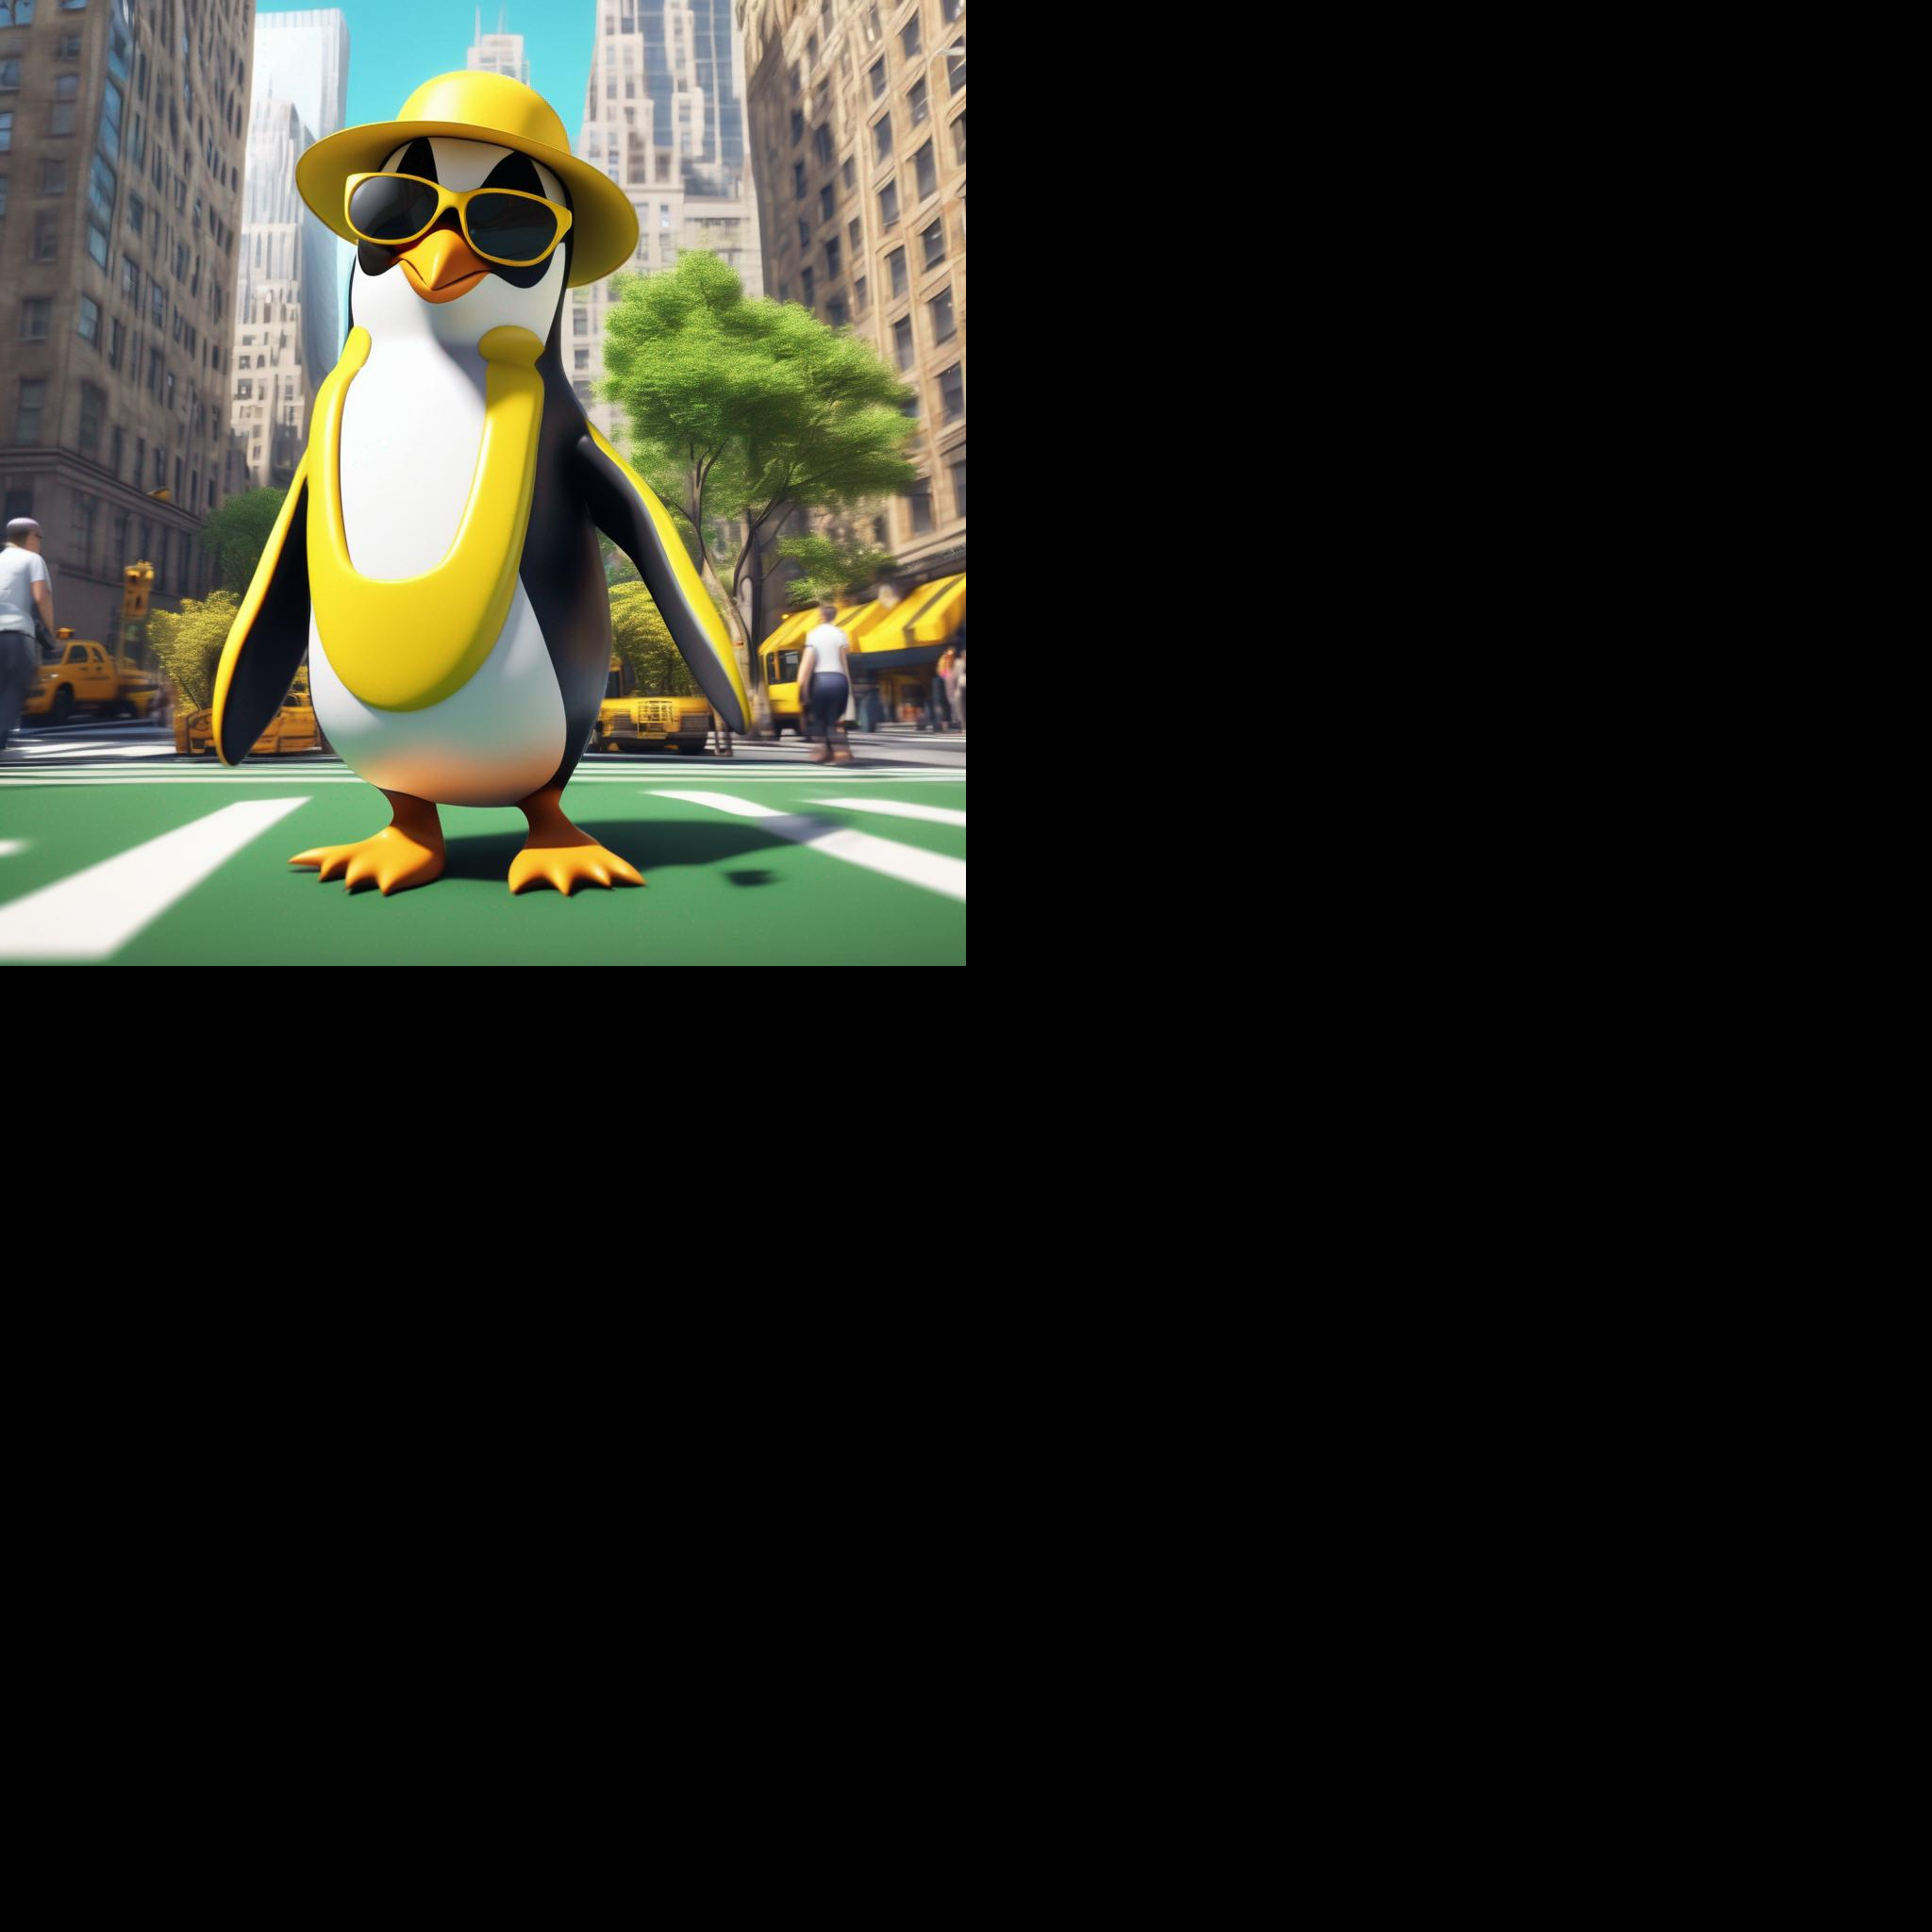

In [18]:
params = dict(height = 1024,
              width = 1024,
              num_inference_steps = 50,
              guidance_scale = 7.5,
              seed  = 123)

prompts = ["""cheerful penguin wearing a bright yellow wide-brimmed sunhat and reflective sunglasses Eye level, photorealistic, 8k, detailed.
                 sidewalk in sunny New York City. Skyscrapers tower in the background, and lush green trees line the streets.  Make the scene vibrant and full of life!""",
             #"""cheerful penguin wearing a bright yellow wide-brimmed sunhat and reflective sunglasses Eye level, photorealistic, 8k, detailed.""",
             #"""A serious capybara at work, wearing a suit, photorealistic""",
             #"""A bottle of aged and exclusive cognac stands on a reflective surface, in front of a vibrant bar, hyper detailed, 4K, bokeh"""
            ]

instances = [{'prompt': prompt, **params} for prompt in prompts]


response = stable_diff_endpoint.predict(instances=instances)
images = [base64_to_image(image) for image in response.predictions]
image_grid(images)

response = stable_diff_endpoint.predict(instances=instances)
images = [base64_to_image(image) for image in response.predictions]
image_grid(images)